# Introducción al problema 
En este notebook se diseñará una red neuronal profunda para predecir el nivel nacional de felicidad en 2015 para una muestra de 158 países a partir de variables como: el PIB per cápita, Expectativa de vida, Percepción de la corrupción, etc. 

La base de datos que se utilizará es la siguiente: https://drive.google.com/file/d/1DcL3knVXMSIT6tMZ97NyZNM9KtE4HaoF/view?usp=sharing



In [ ]:
# Importa las librerías estándar 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Monta el Google Drive en Colab
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Lee el archivo de datos
datos = pd.read_csv("/content/drive/MyDrive/Deep learning course/Bases de datos /2015.csv")

In [ ]:
datos

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
# eliminar columnas innecesarias 
datos.drop(columns=['Happiness Rank','Country','Region','Dystopia Residual','Standard Error'], axis=1, inplace=True)

In [ ]:
datos

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [ ]:
# Elimina aquellos renglones para los cuales no se tiene 
# información en algunas de sus columnas.
nmuestras_antes = datos.shape[0]
print(f"Número de muestras totales en el conjunto de datos: {nmuestras_antes}")
datos=datos.dropna(axis=0)
datos = datos.reset_index(drop=True)
nmuestras_despues = datos.shape[0]
print(f"Numero de muestras para los cuales no se cuenta con información en alguna de sus columnas: {nmuestras_antes-nmuestras_despues}")
print(f"Número de muestras totales después de eliminar renglones con valores NaN: {nmuestras_despues}")

Número de muestras totales en el conjunto de datos: 158
Numero de muestras para los cuales no se cuenta con información en alguna de sus columnas: 0
Número de muestras totales después de eliminar renglones con valores NaN: 158


#### Cada una de las columnas describe una variable del conjunto de datos. En este caso, las variables tienen el siguiente significado:

**Happiness Score**: Una métrica medida en 2015 preguntando a las personas de la muestra: "¿Cómo calificaría su felicidad en una escala del 1 al 10

**Economy (GDP per Capita)**: La medida en que el PIB contribuye al cálculo de la puntuación de felicidad.

**Family**: La medida en que la familia contribuye al cálculo de la puntuación de felicidad

**Health (Life Expectancy)**= La medida en que la esperanza de vida contribuye al cálculo de la puntuación de felicidad	

**Freedom**: La medida en que Freedom contribuye al cálculo de la puntuación de felicidad.

**Trust (Government Corruption)**: La medida en que la percepción de la corrupción contribuye a la puntuación de felicidad.

**Generosity**: La medida en que la autopercepción de generosidad contribuye a la puntuación de felicidad. 

##English translation
Each of the columns describes a variable in the data set. In this case, the variables have the following meaning:
Happiness Score: A metric measured in 2015 by asking people in the sample, "How would you rate your happiness on a scale from 1 to 10.

Economy (GDP per Capita): The extent to which GDP contributes to the happiness score calculation.

Family: The extent to which the family contributes to the calculation of the happiness score.

Health (Life Expectancy)= The extent to which life expectancy contributes to the calculation of the happiness score.

Freedom: The extent to which Freedom contributes to the calculation of the happiness score.

Trust (Government Corruption): The extent to which the perception of corruption contributes to the happiness score.

Generosity: The extent to which self-perceived generosity contributes to the happiness score.

In [ ]:
# Construye la matriz de atributos 
x = datos.drop(['Happiness Score'], axis=1)
print(30*'--'+ " Variables que influyen en la puntuación de la felicidad " + 30*'--')
print(x)

# Construye el vector de etiquetas 
y = datos['Happiness Score'].to_numpy()
print(30*'--'+ "puntuación de la felicidad (escala del 1 al 10) por país' " + 25*'--')
print(y)

------------------------------------------------------------ Variables que influyen en la puntuación de la felicidad ------------------------------------------------------------
     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587              

In [ ]:
# Separa el conjunto de datos inicial en los conjunto de entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=13)

In [ ]:
# Imprime el tamaño del subconjunto de entrenamiento y prueba
print(f"Tamaño de las caracteristicas de entrenamiento: {x_train.shape}")
print(f"Tamaño de las etiquetas de entrenamiento: {y_train.shape}")

print(f"Tamaño de las características de prueba:{x_test.shape}")
print(f"Tamaño de las etiquetas de prueba: {y_test.shape} ")

Tamaño de las caracteristicas de entrenamiento: (142, 6)
Tamaño de las etiquetas de entrenamiento: (142,)
Tamaño de las características de prueba:(16, 6)
Tamaño de las etiquetas de prueba: (16,) 


In [ ]:
# Previsualiza algunos de los datos de entrenamiento
x_train

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
145,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377
21,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542
90,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318
137,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798
56,0.59325,1.14184,0.74314,0.55475,0.19317,0.27815
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
98,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192
16,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034
74,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860


In [ ]:
# Previsualiza algunos de los valores correspondientes al valor de los departamentos para un edificio dado
y_train

array([3.781, 6.853, 5.057, 3.995, 5.828, 4.517, 5.253, 7.286, 5.833,
       6.983, 6.94 , 3.575, 2.839, 5.589, 5.129, 5.984, 7.119, 5.716,
       3.819, 5.477, 6.485, 5.995, 5.007, 3.681, 6.798, 5.548, 5.102,
       7.2  , 6.611, 5.013, 3.904, 4.874, 3.667, 4.61 , 4.297, 6.269,
       4.898, 6.123, 4.565, 6.937, 3.34 , 3.655, 3.931, 7.284, 5.709,
       6.574, 4.715, 4.518, 4.252, 7.522, 6.003, 4.681, 4.419, 7.427,
       4.194, 5.77 , 5.194, 5.96 , 6.867, 6.329, 5.89 , 5.824, 5.605,
       4.677, 4.694, 5.855, 4.8  , 4.857, 4.307, 6.67 , 3.006, 5.695,
       6.75 , 4.949, 4.786, 4.839, 7.187, 6.298, 5.429, 5.791, 6.575,
       5.192, 3.678, 6.13 , 5.987, 5.073, 5.975, 5.124, 7.587, 7.406,
       6.901, 4.959, 6.302, 5.754, 5.759, 3.989, 4.686, 4.292, 7.278,
       4.642, 5.14 , 6.295, 5.123, 5.212, 4.512, 4.571, 7.378, 4.369,
       4.436, 4.077, 4.033, 7.364, 5.474, 4.633, 3.845, 5.948, 5.098,
       4.507, 4.514, 4.218, 4.55 , 6.411, 6.81 , 5.813, 5.286, 6.168,
       7.226, 6.786,

In [ ]:
# Escala los datos de entrenamiento y prueba
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled


array([[-1.37459773e+00,  5.79358770e-02, -1.08912437e+00,
        -6.45899725e-01, -7.63126332e-01,  8.32819238e-01],
       [ 1.24250143e+00,  3.40604561e-01,  5.13157861e-01,
         1.32312330e+00,  1.41562840e+00, -1.82710286e-01],
       [-1.61010768e+00, -1.24795104e-01, -8.50935335e-01,
         2.41831934e-01,  2.01806707e+00,  2.09410137e+00],
       [-1.43415085e+00,  1.74303652e-01, -1.83139179e+00,
        -2.58585978e-01, -2.25699622e-01, -3.99820766e-01],
       [-6.24583874e-01,  5.54981291e-01,  4.30562088e-01,
         8.17911739e-01,  3.41019082e-01,  3.13621362e-01],
       [-2.06897836e+00,  5.26496797e-02, -2.28507918e+00,
        -1.31137457e+00, -6.10319767e-01,  7.77589926e-02],
       [-1.93225473e-01,  4.19647497e-01, -2.81184469e-01,
         6.70928148e-01,  2.59674208e-02,  1.91053857e+00],
       [ 9.74853244e-01,  1.19014647e+00,  1.12614311e+00,
         1.36613657e+00,  2.26167881e+00,  1.87121499e+00],
       [ 7.24199368e-01,  9.67911876e-01,  3.806

##Diseño de la red neuronal profunda 

### A continuación de diseñará será la red neuronal necesaria para construir el modelo predictivo capaz de estimar la puntuación de la felicidad en función de las variables mencionadas lineas arribas. Esta red neuronal profunda contará  con las siguientes características:

Capa de entrada: Esta contendrá las características de un edificio en particular, por lo que, el tamaño de esta capa será igual al número de columnas o características de un edificio. Esto se indica con el parámetro input_dim.

Primera capa oculta: Esta contendrá 8 neuronas, cada una de ellas activada por una función relu.

Segunda capa oculta: Esta contendrá 16 neuronas, cada una de ellas activada por una función relu.

Tercera capa oculta: Esta contendrá 16 neuronas, cada una de ellas activada por una función relu.

Cuarta capa oculta: Esta contendrá 8 neuronas, cada una de ellas activada por una función relu.

Capa de salida: Contendrá sólo una neurona y será activada por una función lineal linear.

## English translation
Next, the neural network needed to build the predictive model capable of estimating the happiness score as a function of the variables mentioned above will be designed. This deep neural network will have the following characteristics:
Input layer: this will contain the features of a particular building, so, the size of this layer will be equal to the number of columns or features of a building. This is indicated by the input_dim parameter.

First hidden layer: This will contain 8 neurons, each of them activated by a relu function.

Second hidden layer: This will contain 16 neurons, each triggered by a relu function.

Third hidden layer: This will contain 16 neurons, each activated by a relu function.

Fourth hidden layer: This will contain 8 neurons, each activated by a relu function.

Output layer: It will contain only one neuron and will be activated by a linear linear function.

In [ ]:
# Diseño de la red nueronal
modelo_regresion = Sequential()
modelo_regresion.add(Dense(input_dim=x_train_scaled.shape[1], units=8, activation='relu'))
modelo_regresion.add(Dense(units=16, activation='relu'))
modelo_regresion.add(Dense(units=16, activation='relu'))
modelo_regresion.add(Dense(units=8, activation='relu'))
modelo_regresion.add(Dense(units=1, activation='linear'))

In [ ]:
# Imprime el resumen del modelo junto con el número de parámetros que deberá aprender
modelo_regresion.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 56        
                                                                 
 dense_11 (Dense)            (None, 16)                144       
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compila la acquitectura de la red neuronal
#modelo_regresion.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelo_regresion.compile(optimizer='adam', loss='mse')

In [ ]:
#Configuración del criterio de paro automático en el proceso de entrenamiento de la red neuronal
cp_early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=3, mode='auto', verbose=1)

In [ ]:
# Entrena la red neuronal profunda
callbacks = [cp_early_stopping_callback]
history = modelo_regresion.fit(x_train_scaled, y_train, epochs=200, validation_split=0.20, callbacks=callbacks)

Epoch 1/200
4/4 [==============================] - 1s 63ms/step - loss: 28.1990 - val_loss: 26.6627
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 27.3953 - val_loss: 25.7549
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 26.5402 - val_loss: 24.7851
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 25.6435 - val_loss: 23.7597
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 24.6463 - val_loss: 22.6627
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 23.5922 - val_loss: 21.4659
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 22.3931 - val_loss: 20.1615
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 21.1299 - val_loss: 18.7428
Epoch 9/200
4/4 [==============================] - 0s 15ms/step - loss: 19.7696 - val_loss: 17.2792
Epoch 10/200
4/4 [==============================] - 0s 13ms/step - loss: 18.3230 - val_loss: 15.7834

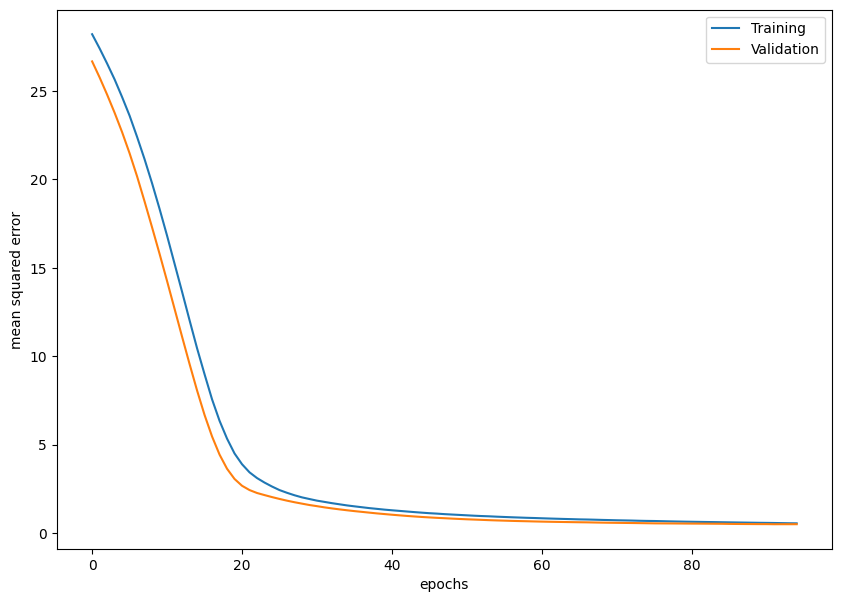

In [ ]:
# Visualice la precisión de los conjuntos de entrenamiento y validación
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.legend(['Training', 'Validation'])

Se puede apreciar que ambas curvas muestran un comportamiento decreciente, avanzando de manera muy pareja, con una separación muy tenue. Si nos apoyamos de los últimos valores de loss y loss_val reportados en el proceso de entrenamiento de la red neuronal:

Epoch 4/4 95/200 [==============================] - 0s 31ms/step - loss: 0.5542 - val_loss: 0.5056

Se observa que el MSE del modelo usando el conjunto de validación es menor que el reportado para el conjunto de entrenamiento. En modelos de regresión se espera que esto sea lo contrario, sin embargo, en este caso, esa diferencia no es considerable, por lo que podríamos confirmar que el modelo obtenido se ajusta de manera adecuada a los datos de entrenamiento.

## English translation
It can be seen that both curves show a decreasing behavior, advancing very evenly, with a very tenuous separation. If we rely on the last values of loss and loss_val reported in the training process of the neural network:

Epoch 4/4 95/200 [==============================] - 0s 31ms/step - loss: 0.5542 - val_loss: 0.5056.

It is observed that the MSE of the model using the validation set is lower than that reported for the training set. In regression models this is expected to be the opposite, however, in this case, that difference is not considerable, so we could confirm that the model obtained fits the training data adequately.

In [ ]:
# Obtiene el coeficiente de determinación del modelo 
# calculado usando lo datos de entrenamiento
y_pred_nn = modelo_regresion.predict(x_train_scaled)
print(r2_score(y_train, y_pred_nn))

5/5 [==============================] - 0s 3ms/step
0.601620250195277


In [ ]:
#obtiene el coeficiente de determinación usando regresión linear
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_train)
print(r2_score(y_train, y_pred))

0.8080124963699841


In [ ]:
# Calcula el MSE para el modelo de regresión usando la red neuronal
y_pred_test_nn = modelo_regresion.predict(x_test_scaled)
print(f"MSE generado por el modelo predictivo obtenido mediante la red neuronal: {mean_squared_error(y_test, y_pred_test_nn)}")

# Calcula el MSE para el modelo de regresión usando mínimos cuadrados
y_pred_test = model.predict(x_test)
print(f"MSE generado por el modelo predictivo obtenido mediante mínimos cuadrados: {mean_squared_error(y_test, y_pred_test)}")

1/1 [==============================] - 0s 26ms/step
MSE generado por el modelo predictivo obtenido mediante la red neuronal: 1.0200177950327336
MSE generado por el modelo predictivo obtenido mediante mínimos cuadrados: 0.5728543989242938
